# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2.  Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt)
3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

## 1. Leitura dos papéis brasileiros e cotações de ações americanas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
df_br = pd.read_csv('bases_case1/acoes_brasileiras.csv', sep=";",decimal=',')
df_br['Date'] = pd.to_datetime(df_br['Date'], format='%Y-%m-%d')
df_us = pd.read_csv('bases_case1/acoes_americanas.txt', sep=";")
df_us['Date'] = pd.to_datetime(df_us['Date'], format='%Y-%m-%d')

In [14]:
df_br.tail()

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
4536,2023-03-31,16.57,23.450001,80.290001,40.549999
4537,2023-04-03,15.41,24.490000,80.309998,39.590000
4538,2023-04-04,15.39,24.270000,78.040001,39.630001
4539,2023-04-05,14.97,24.350000,76.889999,38.750000
4540,2023-04-06,15.71,24.000000,76.750000,38.610001


In [4]:
df_br.dtypes

Date        datetime64[ns]
LREN3.SA           float64
PETR4.SA           float64
VALE3.SA           float64
WEGE3.SA           float64
dtype: object

In [5]:
df_br.describe()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
count,4541.000000,4541.000000,4541.000000,4541.000000
mean,218.200204,9.865522,28.840402,8.891268
std,1301.405980,4.845685,20.734838,11.335573
min,0.892573,1.850761,5.583508,0.809005
25%,4.847134,6.899048,15.915184,2.040649
50%,10.345457,8.792815,21.834671,3.887066
75%,26.687101,12.070403,33.117466,8.600175
max,10334.453125,33.003029,95.894073,44.467350


In [6]:
df_br.isnull().sum()

Date        0
LREN3.SA    0
PETR4.SA    0
VALE3.SA    0
WEGE3.SA    0
dtype: int64

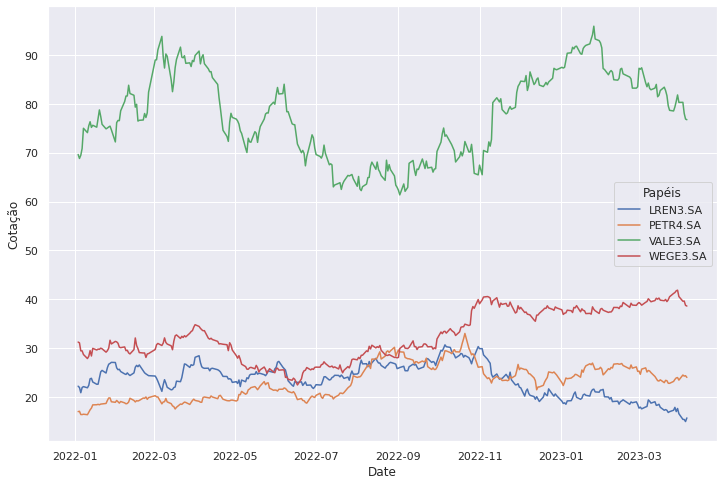

In [7]:
df_br_new = pd.melt(df_br, id_vars='Date', value_vars=['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue = 'Papéis', data=df_br_new.loc[df_br_new['Date'].dt.year >= 2022])
plt.show()

In [15]:
df_us.tail()

,Date,AAPL,KO,META,MS,MSFT
3838,2023-03-31,164.899994,62.029999,211.940002,87.800003,288.299988
3839,2023-04-03,166.169998,62.400002,213.070007,87.160004,287.230011
3840,2023-04-04,165.630005,62.209999,214.720001,84.820000,287.179993
3841,2023-04-05,163.759995,62.799999,211.479996,83.820000,284.339996
3842,2023-04-06,164.660004,62.840000,216.100006,84.190002,291.600006


In [16]:
df_us.dtypes

Date    datetime64[ns]
AAPL           float64
KO             float64
META           float64
MS             float64
MSFT           float64
dtype: object

In [17]:
df_us.describe()

,AAPL,KO,META,MS,MSFT
count,3843.000000,3843.000000,2739.000000,3843.000000,3843.000000
mean,45.182744,34.249513,148.593118,36.918227,87.805868
std,48.585946,13.021926,86.131248,23.168089,89.022771
min,2.377052,12.142509,17.730000,7.001352,11.376364
25%,11.921888,23.789288,78.449997,21.242930,22.512109
50%,25.078003,32.807693,144.850006,28.998711,41.771603
75%,51.260590,42.589426,191.514999,43.315348,127.520821
max,180.683868,64.306442,382.179993,104.919655,339.075562


In [18]:
df_us.columns

Index(['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT'], dtype='object')

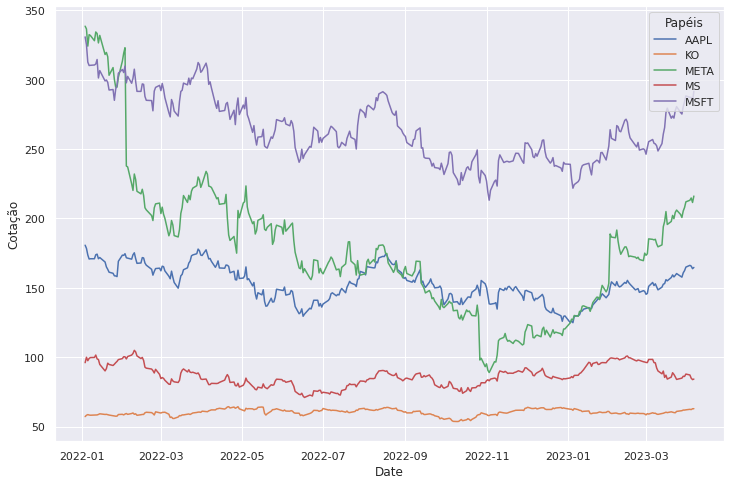

In [19]:
df_us_new = pd.melt(df_us, id_vars='Date', value_vars=['AAPL', 'KO', 'META', 'MS', 'MSFT'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue='Papéis', data=df_us_new.loc[df_us_new['Date'].dt.year >= 2022])
plt.show()

In [20]:
df_us['Date'].min(), df_us['Date'].max()

(Timestamp('2008-01-02 00:00:00'), Timestamp('2023-04-06 00:00:00'))

## 2. Cotação do dolar

In [21]:
import yfinance as yf

dolar = yf.download('USD', start='2008-01-02', end='2023-04-06')
dolar = dolar[['Close']]
dolar = dolar.reset_index()

[*********************100%***********************]  1 of 1 completed


In [22]:
dolar.tail()

,Date,Close
3837,2023-03-30,28.410000
3838,2023-03-31,28.910000
3839,2023-04-03,28.639999
3840,2023-04-04,27.680000
3841,2023-04-05,26.639999


## 3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.

In [23]:
df_us.columns

Index(['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT'], dtype='object')

In [24]:
df_us_new = df_us[['AAPL', 'KO', 'META', 'MS', 'MSFT']].mul(dolar['Close'], axis=0)
df_us_new['Date'] = df_us['Date']

In [25]:
'''df_us_new = df_us.merge(dolar, on='Date', how='left')
for col in ['AAPL', 'KO', 'META', 'MS', 'MSFT']:
    df_us_new[col] = df_us_new[col]*df_us_new['Close']'''

"df_us_new = df_us.merge(dolar, on='Date', how='left')\nfor col in ['AAPL', 'KO', 'META', 'MS', 'MSFT']:\n    df_us_new[col] = df_us_new[col]*df_us_new['Close']"

In [26]:
df_us_new.head()

,AAPL,KO,META,MS,MSFT,Date
0,16.375899,52.664095,NaN,103.902581,71.312699,2008-01-02
1,15.753901,51.170913,NaN,99.890334,68.864440,2008-01-03
2,12.861540,45.316534,NaN,85.447970,59.163810,2008-01-04
3,12.417144,45.391100,NaN,81.935722,58.281823,2008-01-07
4,11.389206,43.364301,NaN,74.874846,53.593179,2008-01-08


## 4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.

In [27]:
df = df_br.merge(df_us_new[['Date', 'AAPL', 'KO', 'META', 'MS', 'MSFT']], on='Date', how='left')
df = df.loc[df['Date']>='2018-03-05']
df

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
3277,2018-03-05,28.429731,9.747345,29.805807,8.130662,500.150102,440.926694,2141.047176,571.389075,1048.864641
3278,2018-03-06,28.095844,9.650399,29.662579,8.116373,515.936587,455.645022,2202.904208,601.299891,1079.188436
3279,2018-03-07,28.177280,9.549047,29.558081,8.062789,513.128489,456.265855,2259.786067,607.045937,1089.641197
3280,2018-03-08,28.217999,9.562267,28.599255,8.019918,516.619549,460.944445,2233.816764,605.428739,1091.802082
3281,2018-03-09,29.170815,9.866319,29.040730,8.216399,548.694560,485.299823,2369.400421,651.134467,1165.474551
...,...,...,...,...,...,...,...,...,...,...
4536,2023-03-31,16.570000,23.450001,80.290001,40.549999,4767.258798,1793.287255,6127.185438,2538.298075,8334.752603
4537,2023-04-03,15.410000,24.490000,80.309998,39.590000,4759.108646,1787.136006,6102.324880,2496.262452,8226.267339
4538,2023-04-04,15.390000,24.270000,78.040001,39.630001,4584.638586,1721.972794,5943.449699,2347.817617,7949.142285
4539,2023-04-05,14.970000,24.350000,76.889999,38.750000,4362.566154,1672.991941,5633.826957,2232.964741,7574.817329


## 5. Simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R_S no dia 06/04/23?

In [28]:
for col in [['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'AAPL', 'KO','META', 'MS']]:
    if col in ['LREN3.SA', 'PETR4.SA', 'VALE3.SA']:
        df[col] = df[col]*100
    elif col == 'WEGE3.SA':
        df[col] = df[col]*200
    elif col == 'AAPL':
        df[col] = df[col]*10
    elif col == 'META':
        df[col] = df[col]*15
    elif col == 'KO':
        df[col] = df[col]*30
    elif col == 'MS':
        df[col] = df[col]*20
        
df['Carteira'] = df[['LREN3.SA', 'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'AAPL', 'KO','META', 'MS']].sum(axis=1)

In [30]:
df.tail()

,Date,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT,Carteira
4536,2023-03-31,16.57,23.450001,80.290001,40.549999,4767.258798,1793.287255,6127.185438,2538.298075,8334.752603,15386.889567
4537,2023-04-03,15.41,24.490000,80.309998,39.590000,4759.108646,1787.136006,6102.324880,2496.262452,8226.267339,15304.631980
4538,2023-04-04,15.39,24.270000,78.040001,39.630001,4584.638586,1721.972794,5943.449699,2347.817617,7949.142285,14755.208699
4539,2023-04-05,14.97,24.350000,76.889999,38.750000,4362.566154,1672.991941,5633.826957,2232.964741,7574.817329,14057.309793
4540,2023-04-06,15.71,24.000000,76.750000,38.610001,NaN,NaN,NaN,NaN,NaN,155.070001


In [31]:
df.loc[df['Date']=='2023-04-06',['Carteira']]

,Carteira
4540,155.070001


## 6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.

In [32]:
ibov = yf.download('^BVSP', start='2018-03-05', end='2023-04-06')
ibov = ibov[['Close']]
ibov = ibov.reset_index()
ibov.rename(columns={'Close':'IBOV'}, inplace=True)
ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Date,IBOV
1258,2023-03-30,103713.0
1259,2023-03-31,101882.0
1260,2023-04-03,101506.0
1261,2023-04-04,101869.0
1262,2023-04-05,100978.0


In [33]:
sep = yf.download('^GSPC', start='2018-03-05', end='2023-04-06')
sep = sep[['Close']]
sep = sep.reset_index()
sep.rename(columns={'Close':'S&P500'}, inplace=True)
sep.tail()

[*********************100%***********************]  1 of 1 completed


,Date,S&P500
1277,2023-03-30,4050.830078
1278,2023-03-31,4109.310059
1279,2023-04-03,4124.509766
1280,2023-04-04,4100.600098
1281,2023-04-05,4090.379883


In [34]:
ibov = pd.merge(ibov,sep, on='Date',how='left')
ibov.head()

,Date,IBOV,S&P500
0,2018-03-05,86023.0,2720.939941
1,2018-03-06,85653.0,2728.120117
2,2018-03-07,85484.0,2726.800049
3,2018-03-08,84985.0,2738.969971
4,2018-03-09,86371.0,2786.570068


## 7. Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.

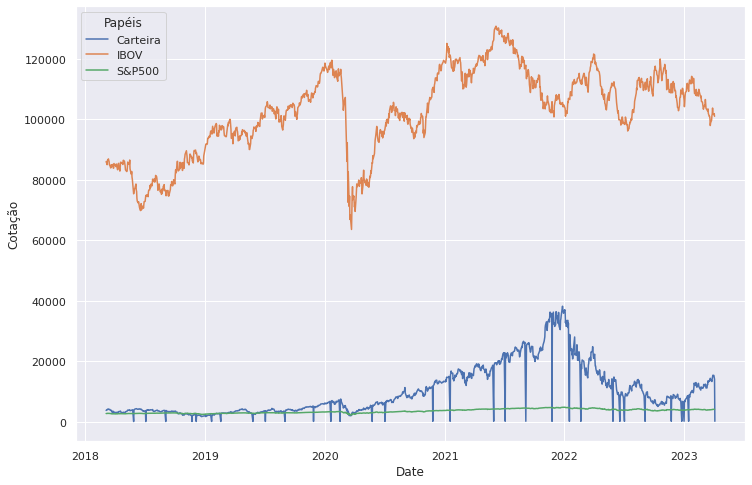

In [42]:
df_plot = df[['Date','Carteira']].merge(ibov, on='Date',how='left')
df_plot_new = pd.melt(df_plot, id_vars='Date', value_vars=['Carteira','IBOV','S&P500'], value_name='Cotação', var_name='Papéis')
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Cotação', hue='Papéis', data=df_plot_new)
plt.show()

## 8. Qual era o saldo da carteira no dia 02/03/2020?

In [46]:
df_plot.loc[df_plot['Date']=='2020-03-02']

,Date,Carteira,IBOV,S&P500
492,2020-03-02,5275.768234,106625.0,3090.22998


In [45]:
df_plot.loc[df_plot['Date']=='2020-03-02','Carteira']

492    5275.768234
Name: Carteira, dtype: float64